<a href="https://colab.research.google.com/github/RemilYoucef/Summer-School-DSAA/blob/main/CompetitionSummerSchool_Youcef_REMIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np

# Load Datasets

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id_train1 = '1Q7OBjTcSA6YyKmDufQ-gREtEz88ac58M'
downloaded = drive.CreateFile({'id': file_id_train1})
downloaded.GetContentFile('train001.csv')
print(os.listdir())
APU001=pd.read_csv('train001.csv')

['.config', 'train001.csv', 'adc.json', 'sample_data']


In [6]:
APU001.dtypes

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Flowmeter          float64
Motor_current      float64
COMP                 int64
DV_eletric           int64
Towers               int64
MPG                  int64
LPS                  int64
Pressure_switch      int64
Oil_level            int64
Caudal_impulses      int64
gpsLong            float64
gpsLat             float64
gpsSpeed             int64
mode                object
dtype: object

In [5]:
print(APU001)

                       timestamp    TP2    TP3  ...  gpsLat  gpsSpeed  mode
0        2020-04-10 00:00:00.140  6.680  8.064  ...  41.212         0     p
1        2020-04-10 00:00:01.130  7.264  8.064  ...  41.212         0     p
2        2020-04-10 00:00:02.120  7.838  8.064  ...  41.212         0     p
3        2020-04-10 00:00:03.110  8.344  8.064  ...  41.212         0     p
4        2020-04-10 00:00:04.110  8.602  8.104  ...  41.212         0     p
...                          ...    ...    ...  ...     ...       ...   ...
1140146  2020-04-25 01:10:48.530 -0.014  6.488  ...   0.000         0     o
1140147  2020-04-25 01:10:49.520 -0.014  6.488  ...   0.000         0     o
1140148  2020-04-25 01:10:50.510 -0.014  6.488  ...   0.000         0     o
1140149  2020-04-25 01:10:51.500 -0.014  6.488  ...   0.000         0     o
1140150  2020-04-25 01:10:52.490 -0.016  6.486  ...   0.000         0     o

[1140151 rows x 21 columns]


# Plot Variable

In [241]:
## An example
slice = 220000

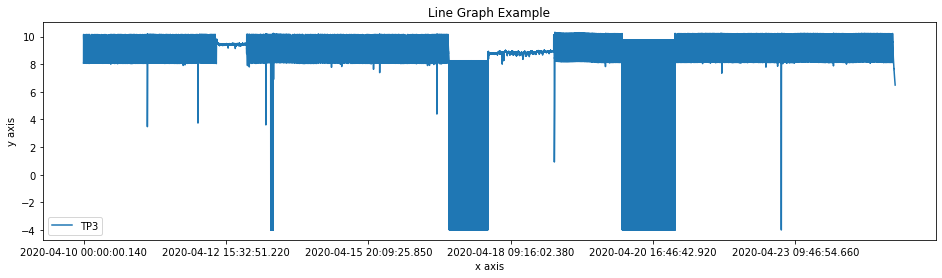

In [169]:
APU001[:].plot(x='timestamp', y='TP3',figsize = (16,4))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

#### Deeper in the features

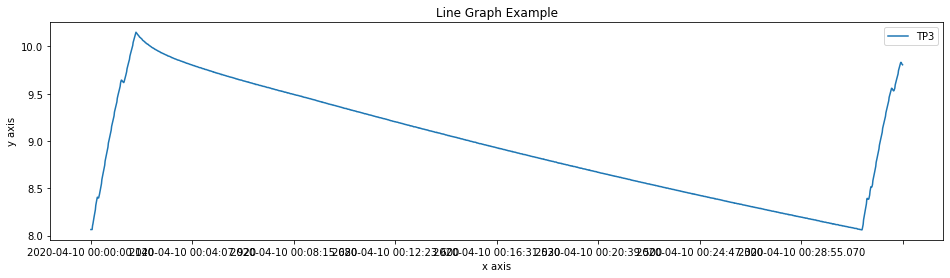

In [219]:
APU001[:2000].plot(x='timestamp', y='TP3',figsize = (16,4))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

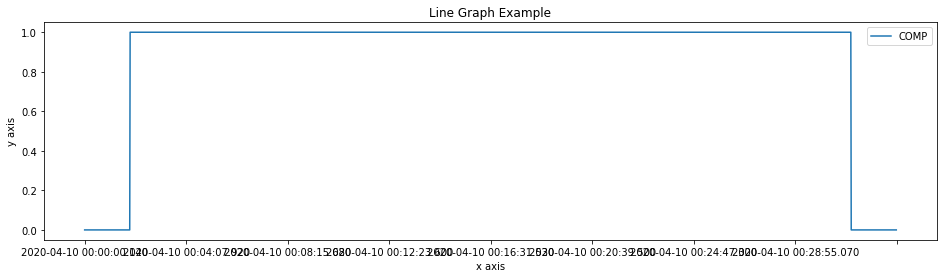

In [226]:
APU001[:2000].plot(x='timestamp', y='COMP',figsize = (16,4))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

####**RQ**: We need to be careful in considering cycles (impulsion):

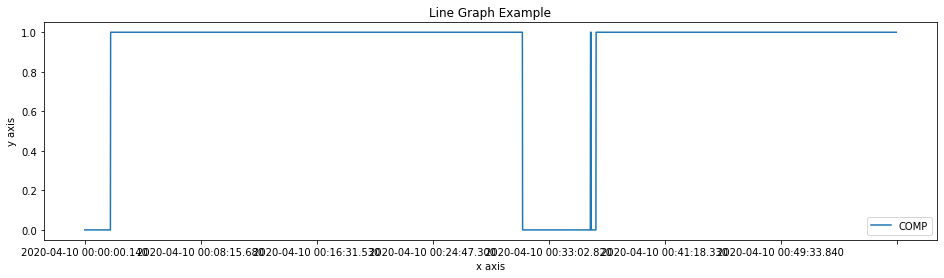

In [242]:
APU001[:3500].plot(x='timestamp', y='COMP',figsize = (16,4))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

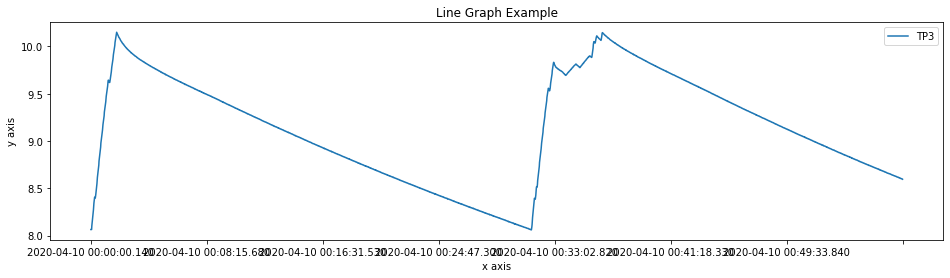

In [243]:
APU001[:3500].plot(x='timestamp', y='TP3',figsize = (16,4))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

### GLOBAL ARCHITECTURE

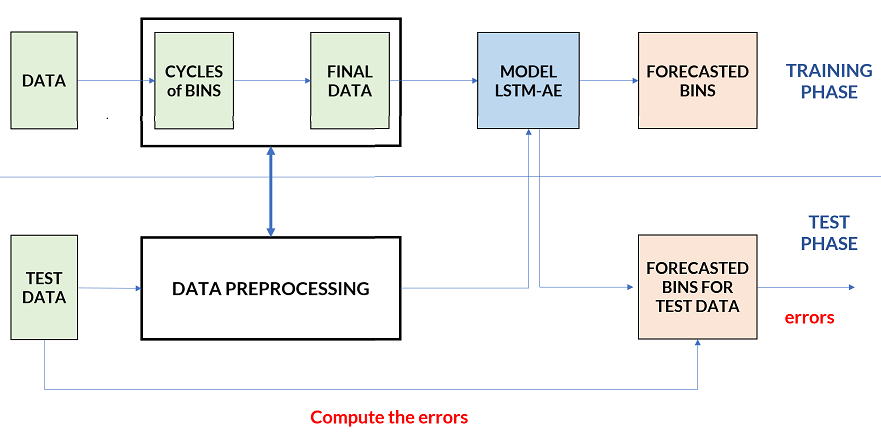

We can verify whether missing values are in our data?

In [9]:
APU001.isnull().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Flowmeter          0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
gpsLong            0
gpsLat             0
gpsSpeed           0
mode               0
dtype: int64

Reporder the data so that to consider numerical features and digital features (boolean)


In [172]:
df = APU001[:]
df = df[['timestamp','TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature','Flowmeter',
         'Motor_current','gpsLong','gpsLat','COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses']]
df.head(2)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,gpsLong,gpsLat,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-04-10 00:00:00.140,6.680,8.064,-0.028,-0.022,8.066,50.925,0.25,5.380,-8.6588,41.212,0,1,0,0,0,1,1,1
1,2020-04-10 00:00:01.130,7.264,8.064,-0.028,-0.024,8.064,50.825,0.25,5.525,-8.6588,41.212,0,1,0,0,0,1,1,1


#### CAPTURE THE **CYCLES**

In [173]:
indices = np.where(np.diff(df.COMP.values))[0] # cycles do not have the same length
indices = np.take(indices, np.where(np.diff(indices) > 100)[0]) # handle implusions

data = dict([(key, []) for key in df.columns])
data

{'COMP': [],
 'Caudal_impulses': [],
 'DV_eletric': [],
 'DV_pressure': [],
 'Flowmeter': [],
 'H1': [],
 'LPS': [],
 'MPG': [],
 'Motor_current': [],
 'Oil_level': [],
 'Oil_temperature': [],
 'Pressure_switch': [],
 'Reservoirs': [],
 'TP2': [],
 'TP3': [],
 'Towers': [],
 'gpsLat': [],
 'gpsLong': [],
 'timestamp': []}

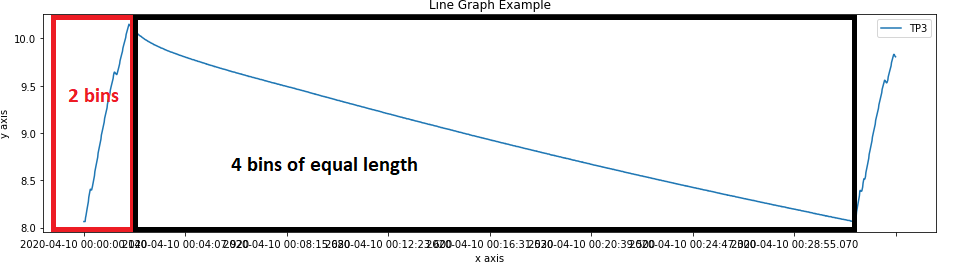

For numerical data we take the mean and for digital data we take the count normalized (it refers to the mean also)

In [174]:
f_indice = 0
for l_indice in indices :
  sub_df = df[f_indice:l_indice + 1].reset_index(drop = True)
  if df['COMP'][l_indice] == 0 :
    # first bin
    data['timestamp'].append((sub_df['timestamp'][0]))
    data['TP2'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['TP2'])
    data['TP3'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['TP3'])
    data['H1'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['H1'])
    data['DV_pressure'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['DV_pressure'])
    data['Reservoirs'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['Reservoirs'])
    data['Oil_temperature'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['TP2'])
    data['Flowmeter'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['Oil_temperature'])
    data['Motor_current'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['Motor_current'])
    data['gpsLong'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['gpsLong'])
    data['gpsLat'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,:11].mean()['gpsLat'])

    data['COMP'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['COMP'])
    data['DV_eletric'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['DV_eletric'])
    data['Towers'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['Towers'])
    data['MPG'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['MPG'])
    data['LPS'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['LPS'])
    data['Pressure_switch'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['Pressure_switch'])
    data['Oil_level'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['Oil_level'])
    data['Caudal_impulses'].append(sub_df[:int(sub_df.shape[0]/2)].iloc[:,11:].sum()['Caudal_impulses'])

    # second bin
    data['timestamp'].append((sub_df['timestamp'][int(sub_df.shape[0]/2)]))
    data['TP2'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['TP2'])
    data['TP3'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['TP3'])
    data['H1'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['H1'])
    data['DV_pressure'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['DV_pressure'])
    data['Reservoirs'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['Reservoirs'])
    data['Oil_temperature'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['TP2'])
    data['Flowmeter'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['Oil_temperature'])
    data['Motor_current'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['Motor_current'])
    data['gpsLong'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['gpsLong'])
    data['gpsLat'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,:11].mean()['gpsLat'])

    data['COMP'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['COMP'])
    data['DV_eletric'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['DV_eletric'])
    data['Towers'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['Towers'])
    data['MPG'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['MPG'])
    data['LPS'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['LPS'])
    data['Pressure_switch'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['Pressure_switch'])
    data['Oil_level'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['Oil_level'])
    data['Caudal_impulses'].append(sub_df[int(sub_df.shape[0]/2):sub_df.shape[0]].iloc[:,11:].sum()['Caudal_impulses'])

  else :
    for i in range(4):
      data['timestamp'].append((sub_df['timestamp'][i*int(sub_df.shape[0]/4)]))
      data['TP2'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['TP2'])
      data['TP3'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['TP3'])
      data['H1'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['H1'])
      data['DV_pressure'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['DV_pressure'])
      data['Reservoirs'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['Reservoirs'])
      data['Oil_temperature'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['TP2'])
      data['Flowmeter'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['Oil_temperature'])
      data['Motor_current'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['Motor_current'])
      data['gpsLong'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['gpsLong'])
      data['gpsLat'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,:11].mean()['gpsLat'])

      data['COMP'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['COMP'])
      data['DV_eletric'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['DV_eletric'])
      data['Towers'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['Towers'])
      data['MPG'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['MPG'])
      data['LPS'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['LPS'])
      data['Pressure_switch'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['Pressure_switch'])
      data['Oil_level'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['Oil_level'])
      data['Caudal_impulses'].append(sub_df[i*int(sub_df.shape[0]/4):(i+1)*int(sub_df.shape[0]/4)].iloc[:,11:].sum()['Caudal_impulses'])


  f_indice = l_indice + 1

### FEATURE EXTRACTION

In [175]:
df_new = pd.DataFrame()
#df_new['timestamp'] = data['timestamp'][0]
df_new['TP2'] = data['TP2']
df_new['TP3'] = data['TP3']
df_new['H1'] = data['H1']
df_new['DV_pressure'] = data['DV_pressure']
df_new['Reservoirs'] = data['Reservoirs']
df_new['Oil_temperature'] = data['Oil_temperature']
df_new['Flowmeter'] = data['Flowmeter']
df_new['Motor_current'] = data['Motor_current']
df_new['gpsLong'] = data['gpsLong']
df_new['gpsLat'] = data['gpsLat']
df_new['COMP'] = data['COMP']
df_new['DV_eletric'] = data['DV_eletric']
df_new['Towers'] = data['Towers']
df_new['MPG'] = data['MPG']
df_new['LPS'] = data['LPS']
df_new['Pressure_switch'] = data['Pressure_switch']
df_new['Oil_level'] = data['Oil_level']
df_new['Caudal_impulses'] = data['Caudal_impulses']

In [176]:
df_new

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,gpsLong,gpsLat,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,8.929071,8.620321,-0.020214,-0.023643,8.617250,8.929071,51.530357,5.960580,-8.658796,41.212000,0,56,40,0,0,56,56,56
1,9.936393,9.708500,-0.012714,-0.023750,9.704643,9.936393,55.785268,6.171295,-8.658790,41.212000,0,56,19,0,0,55,56,56
2,-0.012559,9.709784,9.700261,-0.021320,9.709266,-0.012559,61.625338,3.647697,-8.658779,41.212014,444,0,444,444,0,444,444,444
3,-0.014063,9.174387,9.162410,-0.023401,9.174518,-0.014063,56.321509,0.043446,-8.658806,41.212014,444,0,444,444,0,444,444,444
4,-0.015144,8.699721,8.689252,-0.023604,8.700369,-0.015144,53.467624,0.042601,-8.658825,41.212076,444,0,444,444,0,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,-0.013330,9.183070,9.170738,-0.023476,9.183070,-0.013330,59.474507,0.699162,0.000000,0.000000,355,0,355,355,0,355,355,355
2842,-0.014045,8.733701,8.722389,-0.023577,8.734310,-0.014045,56.656690,0.041394,-2.036143,9.743616,355,0,355,355,0,355,355,355
2843,-0.014417,8.322975,8.312468,-0.023577,8.323645,-0.014417,54.263662,0.041458,-8.602982,41.182840,355,0,355,355,0,355,355,355
2844,8.162667,8.702771,0.107792,0.094271,8.701104,8.162667,54.830469,5.785599,-8.602442,41.183300,0,96,60,0,0,96,96,96


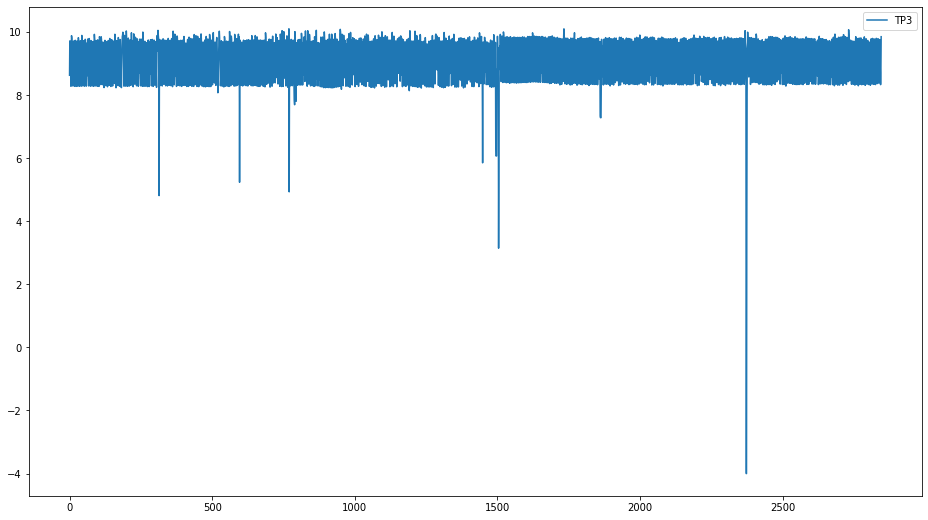

In [177]:
df_new.plot(y='TP3', use_index=True)

In [179]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [180]:
train_df, test_df = df_new[0:300], df_new[300:] 

### Perform scaling

In [ ]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [183]:
def split_series(series, n_past, n_future):

  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [184]:
n_past = 6 # number of bins in the cycle
n_future = 1 # we want to predict one cycle ahead 
n_features = 18 # number of features

In [185]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

### ARCHITECTURE OF THE MODEL

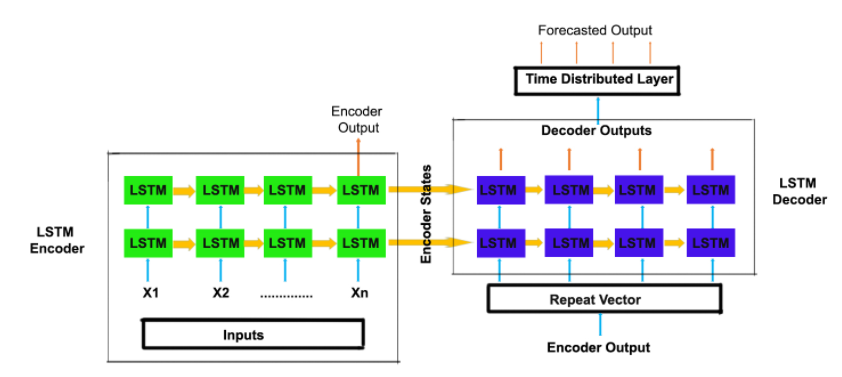

In [186]:
# E1D1

encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 6, 18)]      0                                            
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, 100), (None, 47600       input_5[0][0]                    
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 1, 100)       0           lstm_12[0][0]                    
__________________________________________________________________________________________________
lstm_13 (LSTM)                  (None, 1, 100)       80400       repeat_vector_4[0][0]            
                                                                 lstm_12[0][1]              

In [188]:
# E2D2

encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)

model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)

model_e2d2.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 6, 18)]      0                                            
__________________________________________________________________________________________________
lstm_18 (LSTM)                  [(None, 6, 100), (No 47600       input_7[0][0]                    
__________________________________________________________________________________________________
lstm_19 (LSTM)                  [(None, 100), (None, 80400       lstm_18[0][0]                    
__________________________________________________________________________________________________
repeat_vector_6 (RepeatVector)  (None, 1, 100)       0           lstm_19[0][0]                    
____________________________________________________________________________________________

In [189]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=1,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=1,callbacks=[reduce_lr])

Epoch 1/25
10/10 [==============================] - 4s 112ms/step - loss: 0.2463 - val_loss: 0.3579
Epoch 2/25
10/10 [==============================] - 0s 30ms/step - loss: 0.1551 - val_loss: 0.3317
Epoch 3/25
10/10 [==============================] - 0s 29ms/step - loss: 0.1324 - val_loss: 0.3127
Epoch 4/25
10/10 [==============================] - 0s 30ms/step - loss: 0.1112 - val_loss: 0.2877
Epoch 5/25
10/10 [==============================] - 0s 31ms/step - loss: 0.0866 - val_loss: 0.2677
Epoch 6/25
10/10 [==============================] - 0s 30ms/step - loss: 0.0712 - val_loss: 0.2575
Epoch 7/25
10/10 [==============================] - 0s 30ms/step - loss: 0.0639 - val_loss: 0.2515
Epoch 8/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0581 - val_loss: 0.2467
Epoch 9/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0542 - val_loss: 0.2436
Epoch 10/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0520 - val_loss: 0.2399
Epoch 11

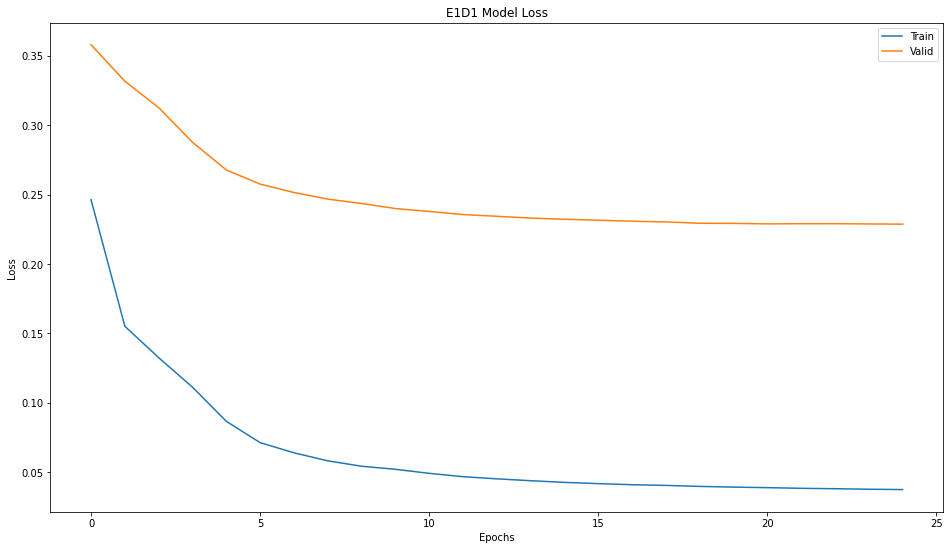

In [190]:
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title("E1D1 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

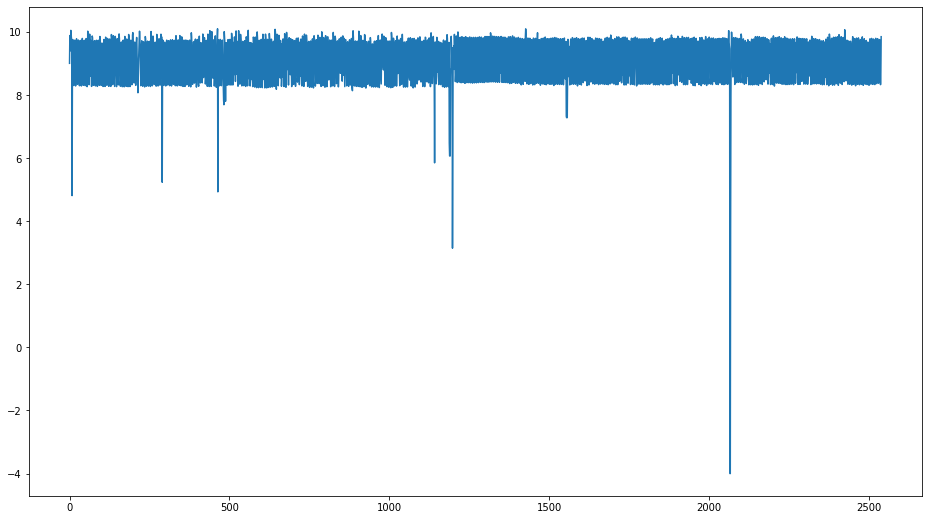

In [228]:
plt.plot(y_test[:,:,1], label = "TP3")

### Make the predictions

In [193]:
pred1_e1d1=model_e1d1.predict(X_test)
pred1_e2d2=model_e2d2.predict(X_test)

pred_e1d1=model_e1d1.predict(X_train)
pred_e2d2=model_e2d2.predict(X_train)

### Inverse the scaling

In [194]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    
    pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [195]:
pred1_e2d2.shape

(2540, 1, 18)

### Predictions of TP3 VS. Real values of TP3


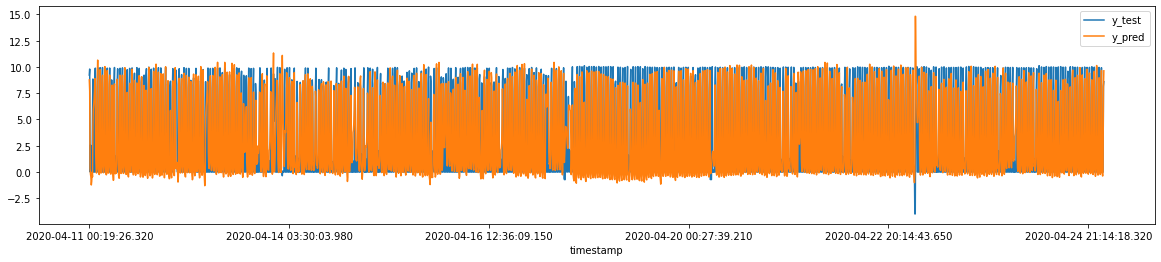

In [196]:
df_plot = pd.DataFrame()
df_plot['timestamp'] = pd.Series(data['timestamp'][305:])
df_plot['y_test'] = pd.Series(np.reshape(y_test[:,:,0], -1))
df_plot['y_pred'] = pd.Series(np.reshape(pred1_e2d2[:,:,0], -1))
df_plot.plot(x="timestamp", figsize=(20,4))

### COMPUTE THE ERRORS (ABSOLUTE VALUES)

In [197]:
df_differences = pd.DataFrame()
df_differences['timestamp'] = pd.Series(data['timestamp'][305:])
for i in range(18) :
  df_differences['diff_column'+str(i)] = pd.Series(np.reshape(y_test[:,:,i] - pred1_e2d2[:,:,i], -1))

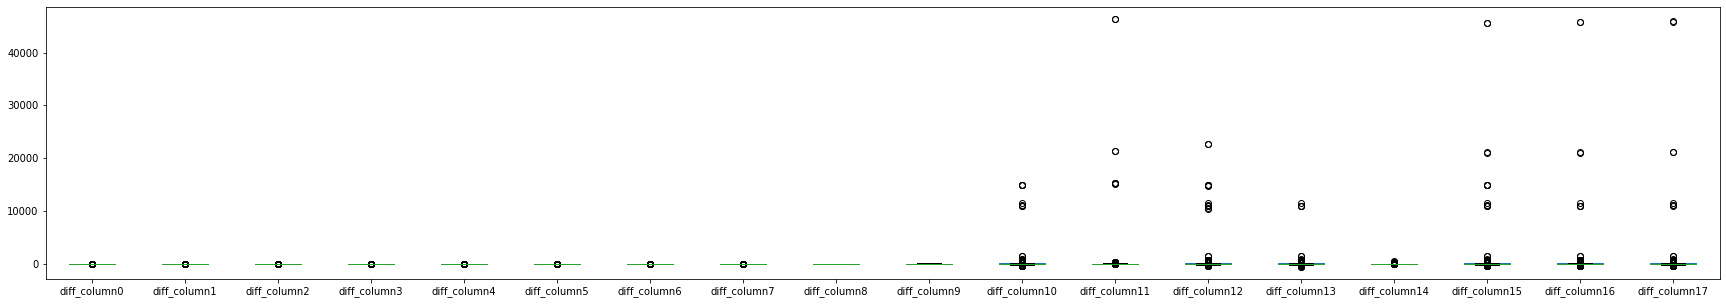

In [198]:
df_differences.plot.box(figsize=(30,5))

**RQ:** not the same scale for erros, we need to scale the erros for each feature

In [199]:
for i in df_differences.columns[1:]:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(df_differences[i].values.reshape(-1,1))
    s_s = np.abs(s_s)
    df_differences[i] = pd.Series(np.reshape(s_s,-1))

In [224]:
df_differences

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,gpsLong,gpsLat,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-04-11 00:19:26.320,0.369685,0.855394,0.201386,0.439212,0.854889,0.371972,0.753083,0.436915,0.280199,0.298303,0.927556,0.995474,0.957751,0.901858,0.997656,0.982372,0.977038,0.981415
1,2020-04-11 00:25:14.170,0.486310,0.824534,0.012549,0.474343,0.821030,0.446890,0.748249,0.427642,0.414668,0.401805,0.940047,0.994908,0.964168,0.919942,0.997571,0.985587,0.981175,0.983538
2,2020-04-11 00:26:17.590,0.313215,0.812740,0.185753,0.410558,0.808672,0.306348,0.741560,0.471150,0.502303,0.511771,0.942353,0.994813,0.964486,0.922050,0.997433,0.985232,0.981256,0.983341
3,2020-04-11 00:27:21.040,0.534623,0.835819,0.113872,0.428418,0.823551,0.536280,0.732672,0.587052,0.203256,0.199329,0.952390,0.991205,0.969301,0.932830,0.997523,0.986161,0.980746,0.984405
4,2020-04-11 00:32:37.410,0.373660,0.966469,0.194597,0.451265,0.949615,0.372076,0.807732,0.812644,0.538955,0.584603,0.974245,0.994591,0.986431,0.961611,0.997456,0.997242,0.991392,0.995426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,2020-04-24 23:49:39.270,0.364036,0.816664,0.094838,0.432290,0.803278,0.353980,0.726740,0.404421,0.209399,0.231146,0.932183,0.994688,0.959588,0.906302,0.997406,0.983586,0.978451,0.981613
2537,2020-04-24 23:55:31.380,0.335700,0.813049,0.138979,0.433101,0.805794,0.327335,0.719620,0.382038,0.583275,0.615480,0.928370,0.994713,0.957060,0.902694,0.997313,0.981745,0.977753,0.979942
2538,2020-04-25 00:01:24.500,0.348259,0.834845,0.151749,0.460478,0.830108,0.333572,0.725678,0.433456,0.544903,0.579381,0.932232,0.993781,0.955772,0.907468,0.997486,0.981022,0.976612,0.979685
2539,2020-04-25 00:07:17.290,0.263427,0.823517,0.210657,0.491280,0.821213,0.227565,0.771814,0.339426,0.500311,0.504085,0.928261,0.994346,0.955201,0.905339,0.997571,0.980861,0.976592,0.978857


In [222]:
df_differences.columns = df.columns

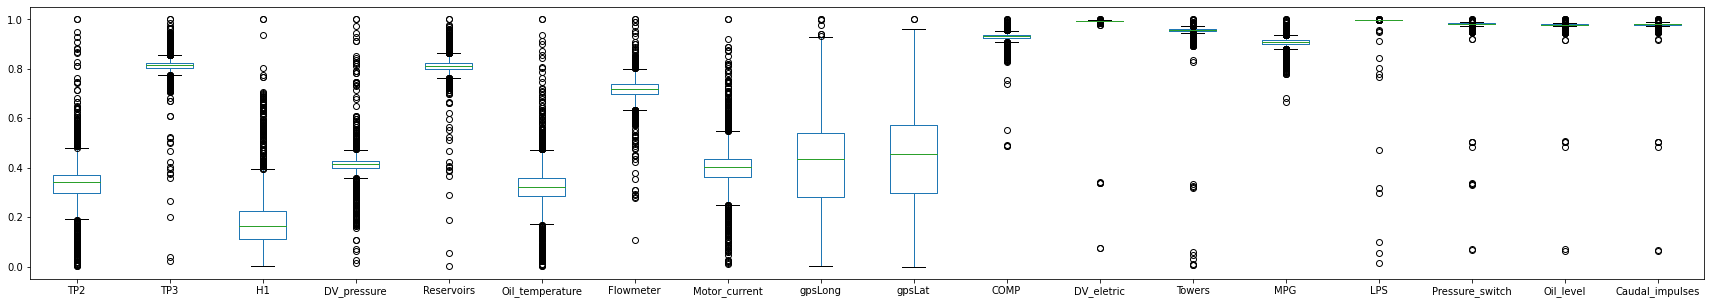

In [223]:
df_differences.plot.box(figsize=(30,5))

## CUMULATED ERROR


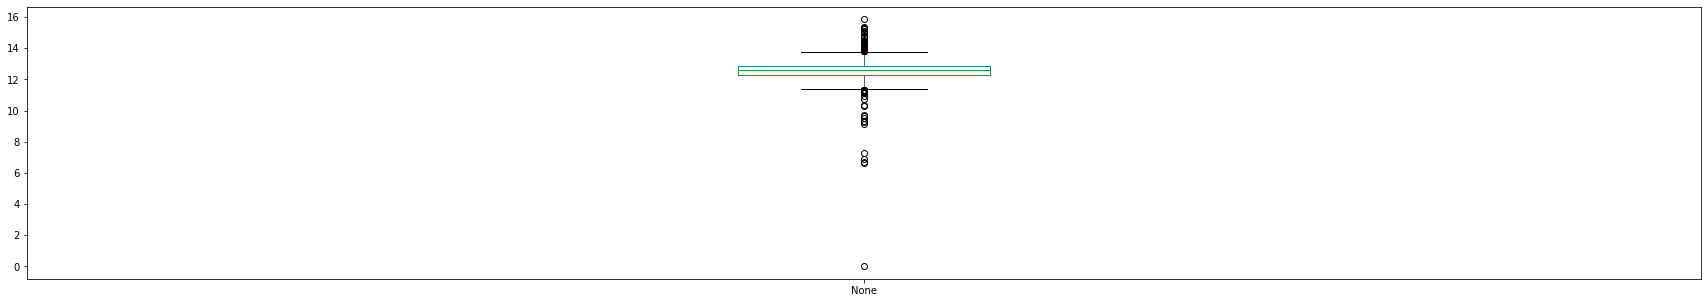

In [202]:
df_differences.sum(axis=1).plot.box(figsize=(30,5))

### Calculate Q1 and Q3 and search for extreme outliers

In [203]:
tmp = np.percentile(df_differences.sum(axis=1).values, [25, 50, 75])

In [216]:
df_differences[(df_differences.sum(axis=1) > tmp[2] + 3*(tmp[2]- tmp[0])) | (df_differences.sum(axis=1) < tmp[1] - 3*(tmp[2]- tmp[0]))]['timestamp']

202     2020-04-11 18:37:02.580
217     2020-04-11 19:20:41.660
218     2020-04-11 19:21:07.430
219     2020-04-11 19:21:36.160
386     2020-04-12 11:43:48.100
387     2020-04-12 11:50:23.690
482     2020-04-13 18:18:38.940
854     2020-04-15 22:07:55.260
982     2020-04-16 10:55:34.190
1094    2020-04-16 21:12:48.430
1142    2020-04-17 00:39:59.740
1188    2020-04-17 08:51:33.060
1189    2020-04-17 08:52:32.560
1190    2020-04-17 12:43:56.770
1191    2020-04-17 16:35:21.570
1192    2020-04-17 20:26:46.210
1193    2020-04-18 00:23:55.730
1427    2020-04-19 19:41:21.000
1554    2020-04-20 04:46:00.570
1555    2020-04-20 04:47:07.960
1556    2020-04-20 09:54:35.570
1557    2020-04-20 15:02:02.850
2067    2020-04-23 01:06:05.840
2068    2020-04-23 01:08:23.610
2540    2020-04-25 00:08:52.420
Name: timestamp, dtype: object